In [1]:
import numpy as np
from metasense.data import load_board
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from nonconformist.cp import IcpRegressor
from nonconformist.nc import NcFactory
sns.set_style('white')

In [2]:
def train_classifier(cf, features, target):
    X, Y = X_train[features], X_train[target]
    X_, Y_ = X_test[features], X_test[target]
    cf.fit(X_train[features], X_train[target])
    Y_pred = cf.predict(X_)
    return cf, (mean_absolute_error(Y, cf.predict(X)), mean_absolute_error(Y_, Y_pred))
def plot_columns(cf, features, gas):
    cf, results = train_classifier(cf, features, "epa-%s" % gas)
    fig, ax = plt.subplots(2)
    plt.suptitle(gas)
    ax[0].set_title('Training Data')
    X_train['%s-pred' % gas] = cf.predict(X_train[features])
    X_train[['%s-pred' % gas, 'epa-%s'%gas]].plot(ax=ax[0], alpha=0.8)
    ax[1].set_title('Test Data')
    X_test['%s-pred' % gas] = cf.predict(X_test[features])
    X_test[['%s-pred' % gas, 'epa-%s'%gas]].plot(ax=ax[1], alpha=0.8)
    print("MAE:", *results)
    print("CvMAE", results[0] / X_train['epa-%s'%gas].mean(), results[1] / X_test['epa-%s'%gas].mean())
    plt.show()

# Donovan

### Board 17

MAE: 4.08330458293 3.88176552859
CvMAE 0.109206322452 0.103383614208


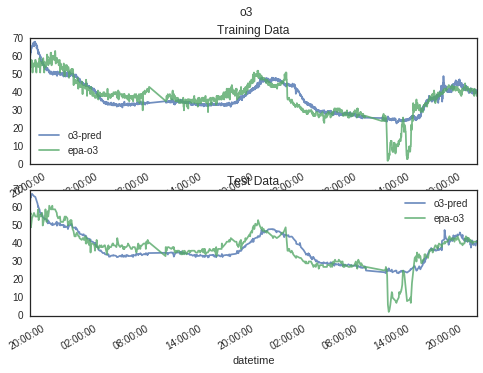

MAE: 2.29002712926 2.20623169842
CvMAE 0.549971876956 0.53884053437


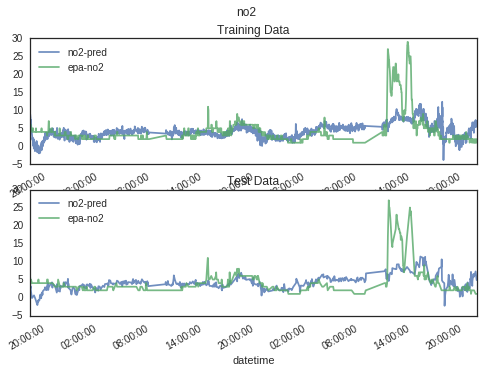

In [3]:
X_train, X_test = load_board('donovan17', sd=True)
plot_columns(LinearRegression(), ['o3', 'temperature', 'no2'], 'o3')
plot_columns(LinearRegression(), ['o3', 'temperature', 'no2', 'humidity'], 'no2')

### Board 19

MAE: 4.22255789696 4.09095351519
CvMAE 0.111287393104 0.1080468456


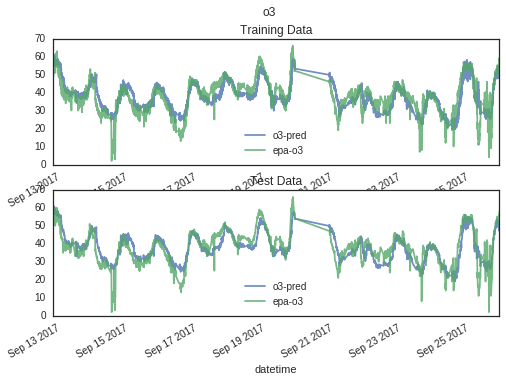

MAE: 2.96550617821 2.89915318907
CvMAE 0.701162026883 0.698405320265


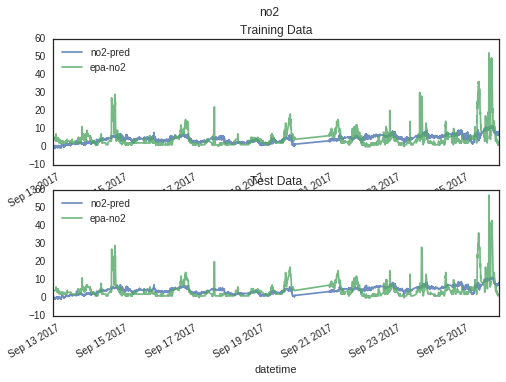

In [4]:
X_train, X_test = load_board('donovan19', sd=True)
plot_columns(LinearRegression(), ['o3', 'temperature', 'no2'], 'o3')
plot_columns(LinearRegression(), ['o3', 'temperature', 'no2', 'humidity'], 'no2')

### Board 21

MAE: 4.30011784729 4.36105404546
CvMAE 0.113354374064 0.115087505404


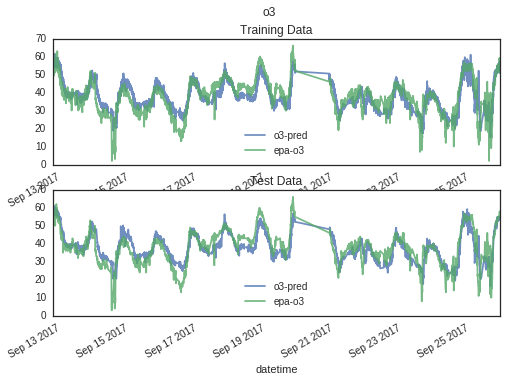

MAE: 2.58862581726 2.48444396102
CvMAE 0.609077125362 0.610660413773


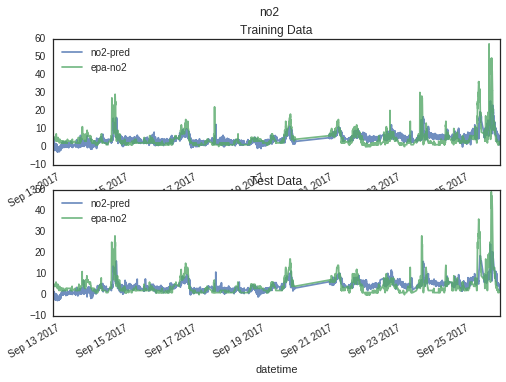

In [5]:
X_train, X_test = load_board('donovan21', sd=True)
plot_columns(LinearRegression(), ['o3', 'temperature', 'no2'], 'o3')
plot_columns(LinearRegression(), ['o3', 'temperature', 'no2', 'humidity'], 'no2')

# El Cajon

### Board 11

MAE: 46.223775407 45.3968789451
CvMAE 0.218995601565 0.217016472763


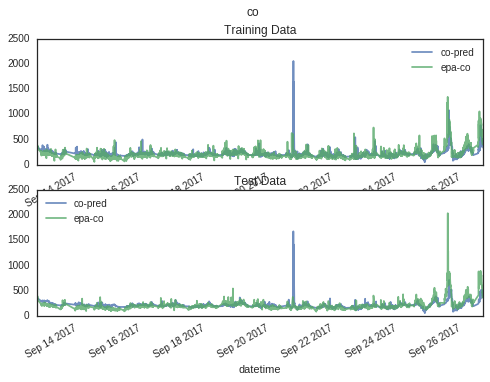

MAE: 8.13767818794 8.26886408635
CvMAE 0.21506005304 0.218457162611


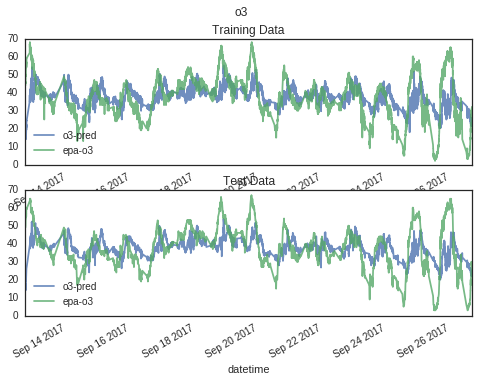

In [6]:
X_train, X_test = load_board('elcajon11', sd=True)
plot_columns(LinearRegression(), ['co'], 'co')
plot_columns(LinearRegression(), ['o3'], 'o3')

### Board 12

MAE: 46.9832288774 45.4331187188
CvMAE 0.222448757185 0.217762279103


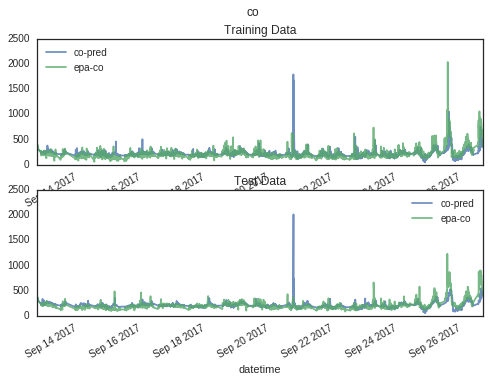

MAE: 6.30450576457 6.46506572786
CvMAE 0.167093426011 0.168863056035


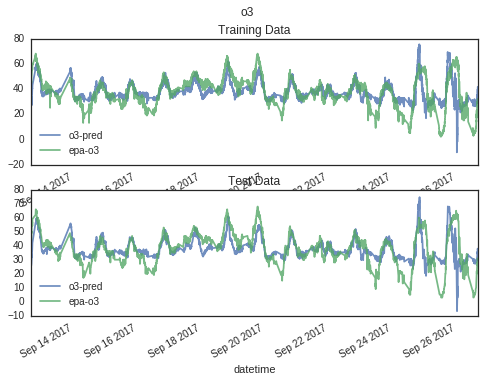

In [7]:
X_train, X_test = load_board('elcajon12', sd=True)
plot_columns(LinearRegression(), ['co'], 'co')
plot_columns(LinearRegression(), ['o3'], 'o3')

### Board 13

MAE: 45.1486213537 46.2184868524
CvMAE 0.214877495415 0.216968217249


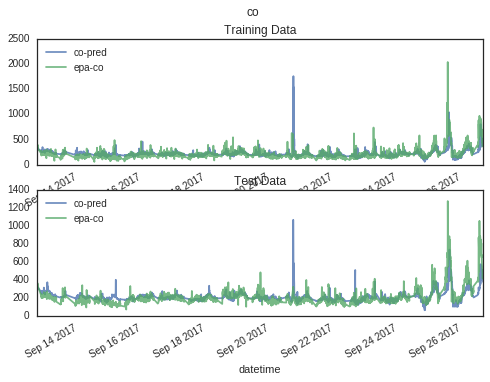

MAE: 5.70844313225 5.90711956572
CvMAE 0.150449434631 0.157787421727


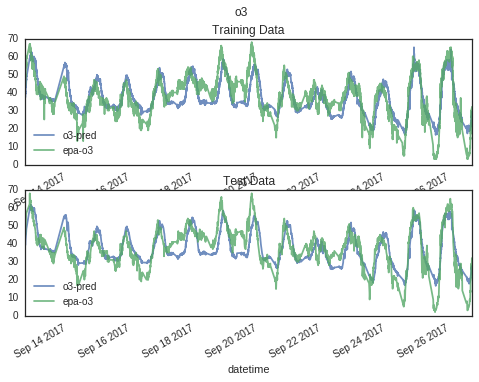

In [8]:
X_train, X_test = load_board('elcajon13', sd=True)
plot_columns(LinearRegression(), ['co'], 'co')
plot_columns(LinearRegression(), ['o3', 'temperature'], 'o3')

# Random Forest

MAE: 22.8110510815 48.8530285425
CvMAE 0.108438754636 0.230398003363


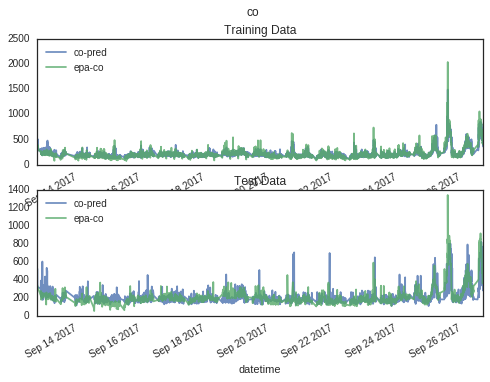

MAE: 1.53404723008 4.11608495723
CvMAE 0.0404896925148 0.109301196356


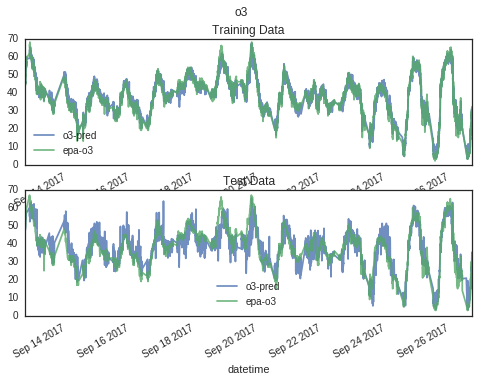

In [9]:
X_train, X_test = load_board('elcajon13', sd=True)
plot_columns(RandomForestRegressor(200), ['co'], 'co')
plot_columns(RandomForestRegressor(200), ['o3', 'temperature'], 'o3')

MAE: 0.98387227918 2.72825504732
CvMAE 0.0259155250098 0.0722224694987


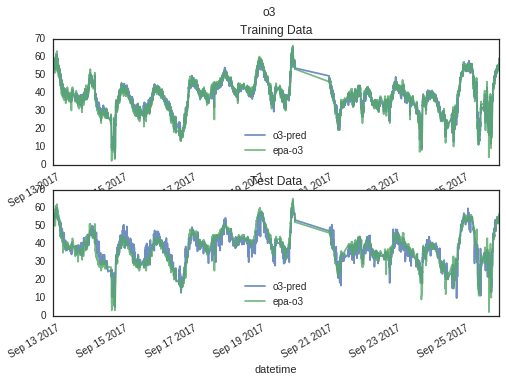

MAE: 0.315651419558 0.864752365931
CvMAE 0.0750156498922 0.204069455818


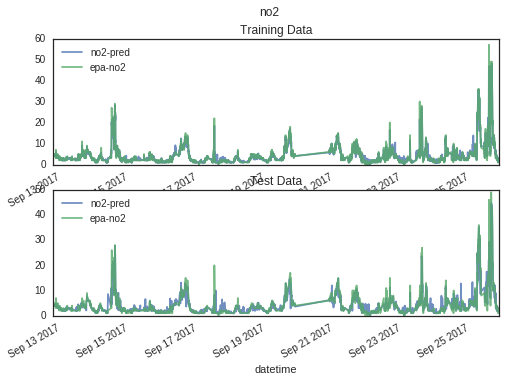

In [10]:
X_train, X_test = load_board('donovan21', sd=True)
plot_columns(RandomForestRegressor(200), ['o3', 'temperature', 'no2'], 'o3')
plot_columns(RandomForestRegressor(200), ['o3', 'temperature', 'no2', 'humidity'], 'no2')

# Intervals

In [11]:
model = LinearRegression()
def train_classifier(cf, features, target):
    cf = IcpRegressor(NcFactory.create_nc(cf))
    X, Y = X_train[features], X_train[target]
    X, X_valid, Y, y_valid = train_test_split(X, Y)
    X_, Y_ = X_test[features], X_test[target]
    cf.fit(X.as_matrix(), Y.as_matrix())
    cf.calibrate(X_valid.as_matrix(), y_valid.as_matrix())
    #Y_pred = cf.predict(X_.as_matrix(), significance=0.05)
    return cf
def plot_columns(cf, features, gas, confidence=0.95):
    cf  = train_classifier(cf, features, "epa-%s" % gas)
    train_results = cf.predict(X_train[features].as_matrix(), significance=1 - confidence)
    test_results = cf.predict(X_test[features].as_matrix(), significance=1 - confidence)

    X_train['lower-%s'%gas], X_train['upper-%s'%gas] = train_results[:, 0], train_results[:, 1]
    X_test['lower-%s'%gas], X_test['upper-%s'%gas] = test_results[:, 0], test_results[:, 1]
    X_train['%s-in-interval'%gas] = (X_train['lower-%s'%gas] <= X_train['epa-%s'%gas]) & (X_train['epa-%s'%gas] <= X_train['upper-%s'%gas])
    X_test['%s-in-interval'%gas] = (X_test['lower-%s'%gas] <= X_test['epa-%s'%gas]) & (X_test['epa-%s'%gas] <= X_test['upper-%s'%gas])
    print("Width:", (X_train['upper-%s'%gas] - X_train['lower-%s'%gas]).mean(),(X_test['upper-%s'%gas] - X_test['lower-%s'%gas]).mean())
    print("Accuracy:", X_train['%s-in-interval'%gas].mean(), X_test['%s-in-interval'%gas].mean())
    fig, ax = plt.subplots(2)
    plt.suptitle(gas)
    ax[0].set_title('Training Data')
    ax[0].fill_between(X_train.index.values, X_train['lower-%s'%gas], X_train['upper-%s'%gas], alpha=0.4)
    X_train['epa-%s'%gas].plot(ax=ax[0], alpha=0.8)
    ax[1].set_title('Test Data')
    X_test['epa-%s'%gas].plot(ax=ax[1], alpha=0.8)
    ax[1].fill_between(X_test.index.values, X_test['lower-%s'%gas], X_test['upper-%s'%gas], alpha=0.4)
    plt.show()


Width: 249.491342258 249.491342258
Accuracy: 0.949996025121 0.95453100159


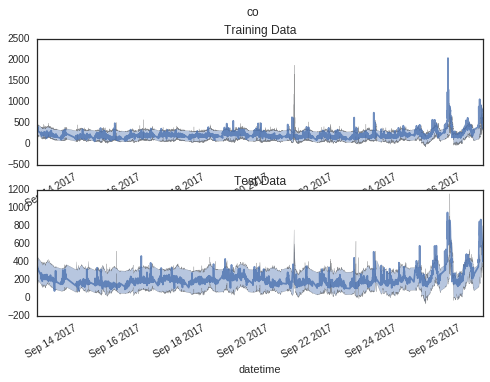

Width: 27.1470268819 27.1470268819
Accuracy: 0.948883059067 0.946899841017


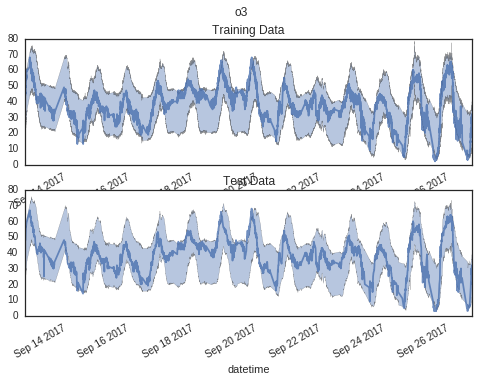

In [12]:
X_train, X_test = load_board('elcajon13', sd=True)
plot_columns(LinearRegression(), ['co'], 'co', confidence=0.95)
plot_columns(LinearRegression(), ['o3', 'temperature'], 'o3')

Width: 295.047 295.047
Accuracy: 0.982749026155 0.945310015898


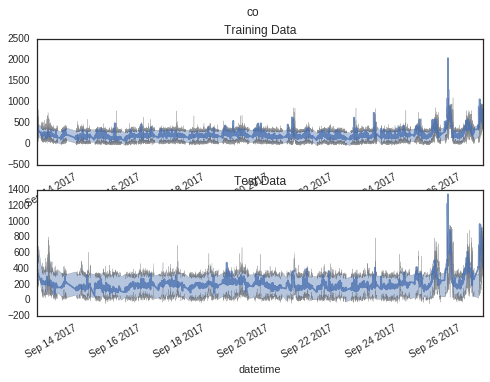

Width: 25.05 25.05
Accuracy: 0.987598378249 0.956120826709


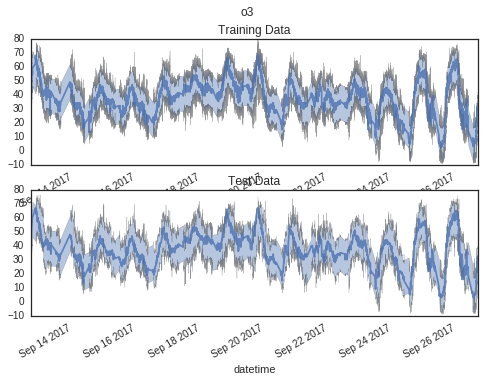

In [13]:
X_train, X_test = load_board('elcajon13', sd=True)
plot_columns(RandomForestRegressor(200), ['co'], 'co')
plot_columns(RandomForestRegressor(200), ['o3', 'temperature'], 'o3')

Width: 22.0236011024 22.0236011024
Accuracy: 0.953627760252 0.957097791798


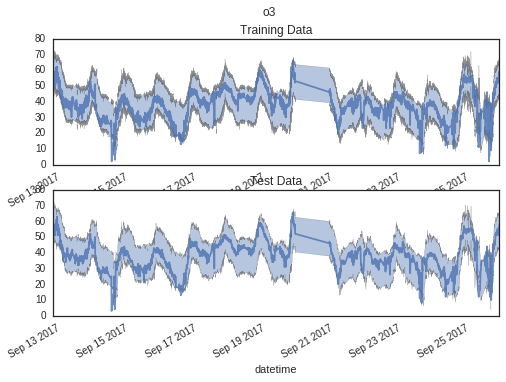

Width: 12.1623199463 12.1623199463
Accuracy: 0.947160883281 0.943217665615


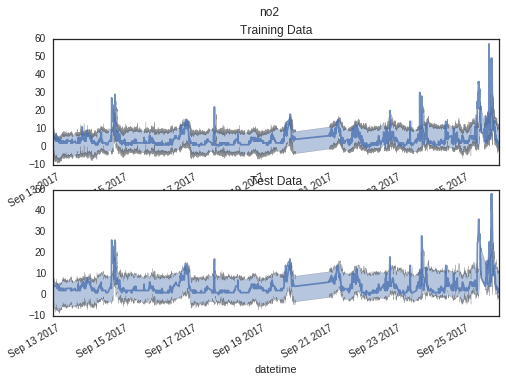

In [ ]:
X_train, X_test = load_board('donovan21', sd=True)
plot_columns(LinearRegression(), ['o3', 'temperature', 'no2'], 'o3')
plot_columns(LinearRegression(), ['o3', 'temperature', 'no2', 'humidity'], 'no2')

Width: 16.33 16.33
Accuracy: 0.986593059937 0.956466876972


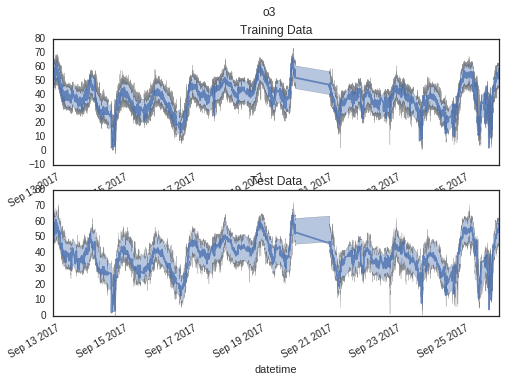

In [ ]:
X_train, X_test = load_board('donovan21', sd=True)
plot_columns(RandomForestRegressor(200), ['o3', 'temperature', 'no2'], 'o3')
plot_columns(RandomForestRegressor(200), ['o3', 'temperature', 'no2', 'humidity'], 'no2')